# Natural Langauge Processing Common EDA Practices in Python
## Zhucheng Zhan, Yunchen Yao

## Introduction

In Natural Language Processing, exploratory data analysis is an important and essential part before training models. We could obtain adequate information from text data visualization, like getting the most frequently used word quickly to understand what the text is about, and many more. 


For the community contribution, we introduce four major techniques that are commonly used to understand text data and give an example of implementing these techniques by python. We take Twitter text data as our example to illustrate the common practices for NLP EDA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
import spacy
from spacy import displacy

/Users/brightside/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/brightside/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/brightside/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/brightside/anaconda3/lib/python3.7/site-packages/tensorflow/

In [2]:
df= pd.read_csv('twitter_data.csv', engine='python')
df = df[["_unit_id", "text"]]
df.head(5)

,_unit_id,text
0,815719226,Robbie E Responds To Critics After Win Against...
1,815719227,���It felt like they were my friends and I was...
2,815719228,i absolutely adore when louis starts the songs...
3,815719229,Hi @JordanSpieth - Looking at the url - do you...
4,815719230,Watching Neighbours on Sky+ catching up with t...


In [3]:
df[df['text'].map(lambda x: x.isascii())]

,_unit_id,text
0,815719226,Robbie E Responds To Critics After Win Against...
2,815719228,i absolutely adore when louis starts the songs...
3,815719229,Hi @JordanSpieth - Looking at the url - do you...
5,815719231,"Ive seen people on the train with lamps, chair..."
6,815719232,@BpackEngineer Thank you for your patience whi...
...,...,...
20045,815757572,"@lookupondeath ...Fine, and I'll drink tea too..."
20046,815757681,Greg Hardy you a good player and all but don't...
20047,815757830,You can miss people and still never want to se...
20048,815757921,@bitemyapp i had noticed your tendency to pee ...


## Text statistics
Text statistics visualizations can help us explore the fundamental characteristics of the text data. For continous data, we will be mostly using histograms and for categorical data, we use bar charts.   
Here are some characteristics that we could explore:  
- word frequency analysis  
- sentence length analysis  
- average word length analysis  



#### The number of characters in each sentence

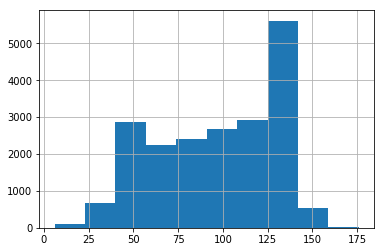

In [4]:
len_ = df['text'].str.len()
len_[len_<200].hist()

#### The number of words in each sentence

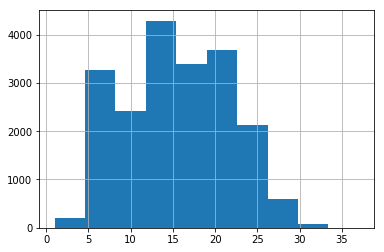

In [5]:

df['text'].str.split().\
    map(lambda x: len(x)).\
    hist()

#### The average word length in each sentence

#### Top stopwords   
Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words usually have a short length, which can cause the histogram above to be left-skewed. In Text Mining and Natural Language Processing (NLP), stop words are commonly used  to eliminate words that are so commonly used that they carry very little useful information.  

Firstly, we analyze the amount and the types of stopwords to obtain better insights into the data.  

We use nltk package to filter the English stopwords in text data.  


In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brightside/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

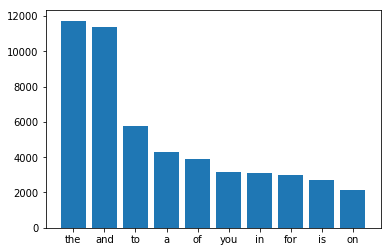

In [7]:
corpus=[]
new= df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

#### Top words other than stopwords

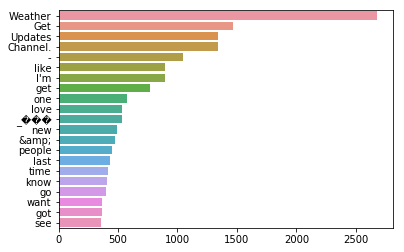

In [8]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:80]:
    if (word.lower() not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

## Ngram exploration   
n-gram is a contiguous sequence of n items from a given sample of text. We could have a good insight into the usage of words in specific context by taking a look of n-gram information.  


#### Top bigrams  
Bigram is a contiguous sequences of 2 words.  

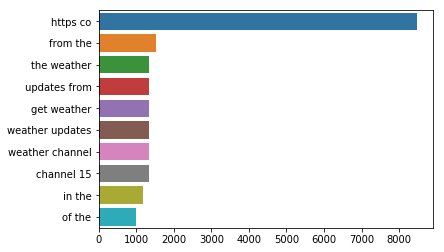

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
plot_top_ngrams_barchart(df['text'],2)


#### Top trigrams  
Trigram is a contiguous sequences of 3 words.

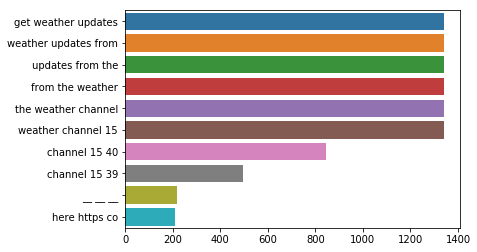

In [10]:
plot_top_ngrams_barchart(df['text'],3)

We can further genealize the above visualization to more grams, but usually we are satisfied with 3-gram.

## Wordcloud

Wordcloud is a great way to represent text data. They are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s).

Python has a powerful package called **wordcloud** and it has automate the wordclouding process for us. To utlize the package, we should first convert the data in a form of corpus, which has been done in the previous section.

In [11]:

import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

corpus=[]
new= df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brightside/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


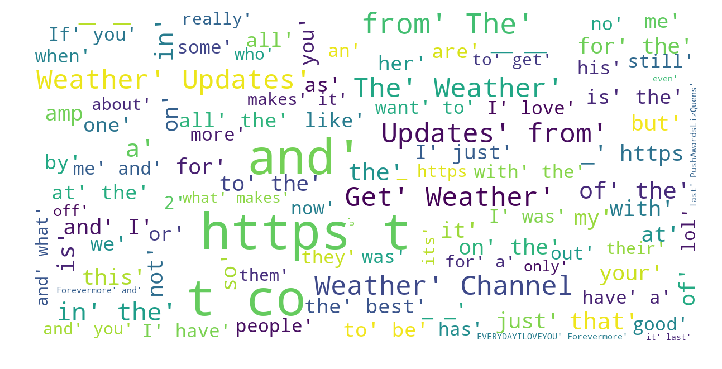

In [12]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

Above is a simple example for our twitter data. 


There are many parameters that can be adjusted. Some of the most prominent ones are:


- stopwords: The set of words that are blocked from appearing in the image.
- max_words: Indicates the maximum number of words to be displayed.
- max_font_size: maximum font size.
- There are many more options to create beautiful word clouds. 

## Grammar Exploration by Parts of Speech Tagging 

Parts of speech (POS) tagging is a method that assigns part of speech labels to words in a sentence. Different language has different number of parts of speech. In English, the main parts of speech are:

- **Noun (NN)**- Columbia, London, woman, cat, girl, pen, city
- **Verb (VB)**- educate, speak, go, eat, run, walk, sleep, like, are, is
- **Adjective(JJ)**- beautiful, happy, sad, young, fun, three, handsome
- **Adverb(RB)**- slowly, quietly, very, always, never, too, well, tomorrow
- **Preposition (IN)**- at, on, in, from, with, near, between, about, under
- **Conjunction (CC)**- and, or, but, because, so, yet, unless, since, if
- **Pronoun(PRP)**- I, you, we, they, he, she, it, me, us, them, him, her, this
- **Interjection (INT)**- Ouch! Wow! Great! Help! Oh! Hey! Hi!


Classification for parts of speech is a complicated NLP task because we cannot only determine a word by itself, but also we have to take the context into consideration.  is not a straightforward task, as the same word may be used in different sentences in different contexts. In our tutorial we will not focus on the algorithm for this classifcation task and jump to the visualization part assuming we have got our result. There are some cool tools that can help you gain more insight in our result in nltk.



Let’s look at an example by performing pos tagging on one sentence

In [13]:
sentence="The community contribution assignment is very fun to do in 2021"
tokens = nltk.word_tokenize(sentence)
nltk.pos_tag(tokens)

[('The', 'DT'),
 ('community', 'NN'),
 ('contribution', 'NN'),
 ('assignment', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('fun', 'JJ'),
 ('to', 'TO'),
 ('do', 'VB'),
 ('in', 'IN'),
 ('2021', 'CD')]

Here we used the displacy function in spacy to visualize the grammar analysis on sentence. We are using the dependency tag representation in this plot. 

For more information on this kind of representation, you can visit [here](https://universaldependencies.org/u/dep/index.html)


In [14]:

nlp = spacy.load("en_core_web_sm")
doc = nlp('The community contribution assignment is very fun to do in 2021')
displacy.render(doc, style='ent')



displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

We perform pos tagging on our whole data, we can explore how our text is constructed.

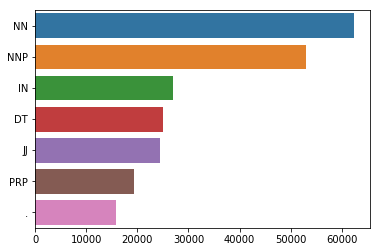

In [15]:
def pos(text):
    pos=nltk.pos_tag(nltk.word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=df['text'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

We can clearly see that the common noun (NN) dominates in twitter data followed by the proper nouns (NNP). This is typical since nouns usually contain more information and twitter text tend to be compact.

## Conclusion

In this tutorial, we discussed and implemented various exploratory data analysis methods for text data. For an common NLP EDA. We usually care about the top popular words in the whole dataset, then we first explore the most common n-grams. Furthermore, we can also utlize wordcloud technique to visualize our result in a fashion way. Finally, we introdcue visualization technique after we run grammar exploration.

## Cited Resources

- [NLP: Text Data Visualization](https://www.numpyninja.com/post/nlp-text-data-visualization) by Namrata Kapoor 
- [Exploratory Data Analysis for Natural Language Processing: A Complete Guide to Python Tools](https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools) by Shahul ES